In [7]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
#Carregando base de dados
df_ML = pd.read_csv('imoveis_zap_fortaleza_ML.csv',sep=";")
df_ML.head()

,Preco,tamanho (m²),qtd_quartos,qtd_banheiro,qtd_vagas,Bairro_Engenheiro Luciano Cavalcante,Bairro_Aldeota,Bairro_Presidente Kennedy,Bairro_Cocó,Bairro_Meireles,Bairro_Papicu,Bairro_Guararapes,Bairro_Dionisio Torres,Bairro_Parque Iracema,Bairro_Paupina,Bairro_Praia do Futuro II,Bairro_Mucuripe,Bairro_Manuel Dias Branco,Bairro_De Lourdes
0,1380282.0,119.0,3,3,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,591401.0,50.0,2,2,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1300000.0,129.0,3,4,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,635000.0,73.0,3,2,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,499000.0,91.0,3,3,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [6]:
#Definição das variaveis
y_rlm = df_ML['Preco']
x_rlm = df_ML.drop(['Preco','qtd_quartos','qtd_banheiro'],axis=1)

#Dividindo base em treino e teste
#Divisão em treino e teste da base
x_train, x_test, y_train, y_test = train_test_split(x_rlm, y_rlm, test_size=0.3, random_state=42)

In [ ]:
#Chamando melhor modelo
# Define o nome do arquivo do modelo que salvamos
nome_arquivo_modelo = 'modelo_random_forest.joblib'
# Carrega o modelo treinado do arquivo para a memória
modelo_otimo = joblib.load(nome_arquivo_modelo)

In [13]:
# Para modelos baseados em árvores, o TreeExplainer é o mais rápido e eficiente
explainer = shap.TreeExplainer(modelo_otimo)

# Calculamos os valores SHAP para o conjunto de teste para entender como o modelo
# se comporta em dados novos.
shap_values = explainer.shap_values(x_test)

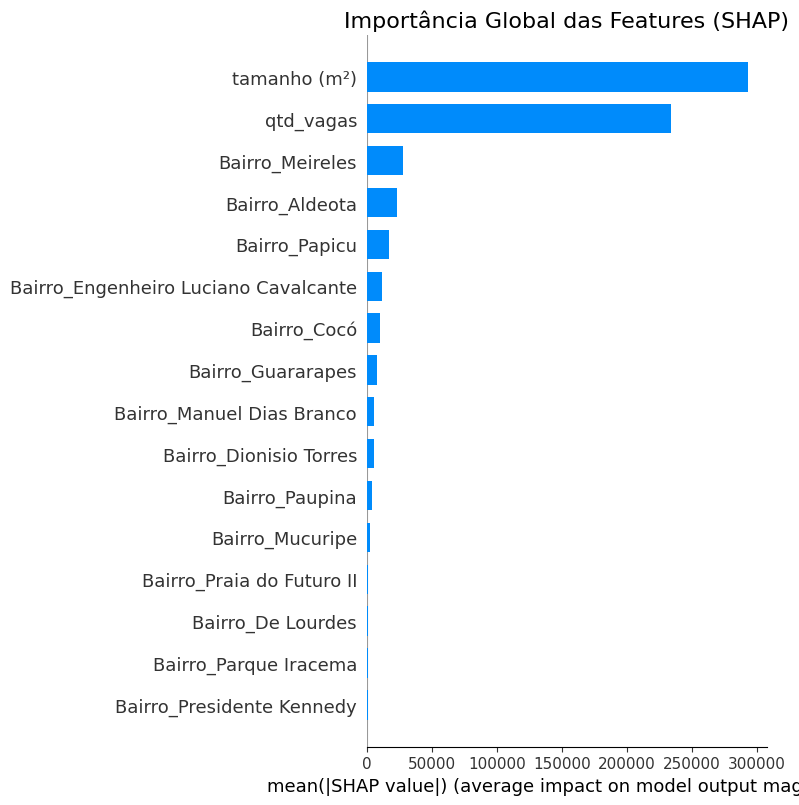

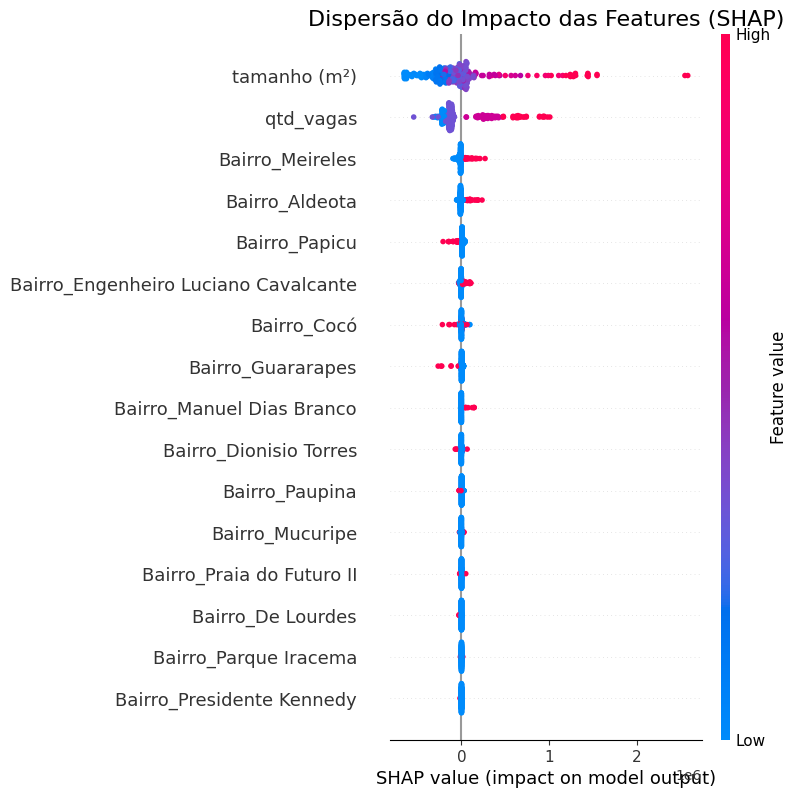

In [18]:
# O Summary Plot é a forma mais poderosa de ver a importância das features
# Ele combina a magnitude do impacto com a direção (positiva ou negativa)
shap.summary_plot(shap_values, x_test, plot_type="bar", show=False)
plt.title('Importância Global das Features (SHAP)', fontsize=16)
plt.show()

shap.summary_plot(shap_values, x_test, show=False)
plt.title('Dispersão do Impacto das Features (SHAP)', fontsize=16)
plt.show()

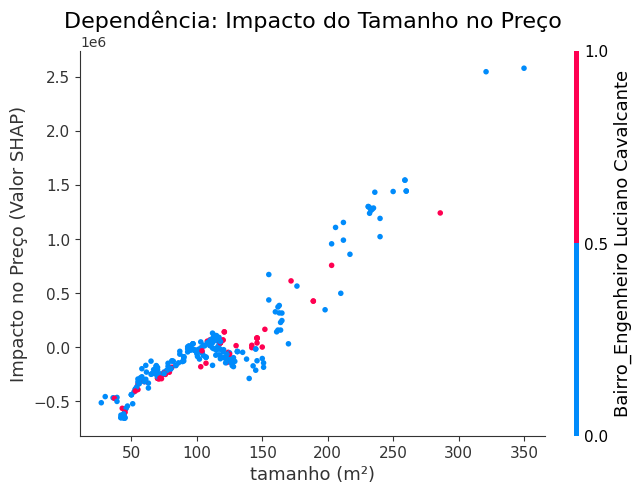

In [22]:
# Vamos analisar a feature mais importante: 'tamanho (m²)'
# 'interaction_index="auto"' permite que o SHAP encontre automaticamente
# outra feature que tenha a maior interação com a que estamos analisando.
shap.dependence_plot(
    'tamanho (m²)', 
    shap_values, 
    x_test, 
    interaction_index="auto",
    show=False
)
plt.title('Dependência: Impacto do Tamanho no Preço', fontsize=16)
plt.ylabel('Impacto no Preço (Valor SHAP)')
plt.show()